## RMSLE란??
- RMSLE 가 0이라면 (가능하냐고? ai와 pi가 모두 일치하면 이렇게 된다.), exp(RMSLE) 는 1이 되고, 예측과실제값의 평균비율을 1이다. 설명과 부합한다


## MSE
 - MSE가 0에 가까울수록 추측한 값이 원본에 가까운 것이기 때문에 정확도가 높다고 할 수 있다.

## 평균 제곱근 오차(Root Mean Square Error; RMSE
 - rmse는 낮을 수록 좋다 -> 이뜻은 다른 데이터들과의 오차가 적다는 뜻을 의미한다.
 - 릿지와 리쏘는 둘다 목표는 수치를 비슷하게 만들어주는 것에 있기 때문이다.

In [ ]:
import pandas as pd
test_df = pd.read_excel('Concrete_Data.xls')
test_df.head(20)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


### 컬럼명을 기존 컬럼명의 부분만 잘라서 가져옴

df_col=df.columns
col_list=[]
for col in df_col:
    split_col=col.split('(')[0]
    col_list.append(split_col)
df.columns=col_list


### 널값 확인

In [ ]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

### df['Concrete compressive strength'] 컬럼을 레이블 값을 하고 실수를 정수로 변경해주었다.

In [ ]:
df['Concrete compressive strength']=df['Concrete compressive strength'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 72.5 KB


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
# 하지만 bike_df에는 널값이 없기 떄문에 log()사용가능
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso
import numpy as np

y_target = df['Concrete compressive strength']
X_features = df.drop(['Concrete compressive strength'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 0.342, RMSE: 9.675, MAE: 7.781


In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_val'])
    result_df['predicted_val']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_val'] - result_df['predicted_val'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)


     real_val  predicted_val  diff
33         47           19.0  28.0
75         23           50.0  27.0
217        12           39.0  27.0
153        45           19.0  26.0
36         28           52.0  24.0


- 가소제(可塑劑, plasticizer, plasticiser)는 물질의 점성을 줄이거나 소성을 줄이는 첨가제이다.
   - 물질의 물리적 속성을 변화시키기 위해 추가되는 물질들이다. 이것들은 휘발성이 낮은 액체이거나 고체이다.
   - 고분자 사슬 간 인력을 감소시켜 유연성을 높인다

<AxesSubplot:>

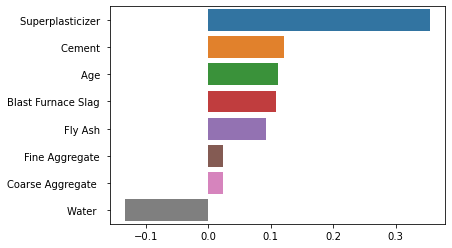

In [ ]:
import seaborn as sns
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

### 콘크리트 강도 레이블

<AxesSubplot:>

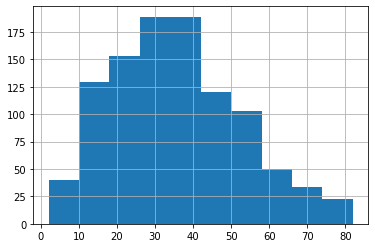

In [ ]:
y_target.hist()

#### 가소재 컬럼

<AxesSubplot:>

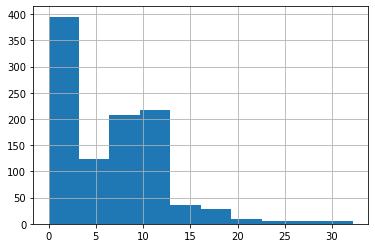

In [ ]:
df['Superplasticizer '].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   int64  
 9   label                          1030 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 80.6 KB


In [ ]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32
